# Data Explorations given external csv files

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import os

In [9]:
bv = pd.read_csv("../references/external/bill_version.csv", sep=";", encoding="latin1", parse_dates=True)
sessions =  pd.read_csv("../references/external/session.csv", sep=";", encoding="latin1", parse_dates=True)
bills =  pd.read_csv("../references/external/bill.csv", sep=";", encoding="latin1", parse_dates=True)
divs =  pd.read_csv("../references/external/division.csv", sep=";", encoding="latin1", parse_dates=True)
bill_leg_vote =  pd.read_csv("../references/external/bill_legislator_vote.csv", sep=";", encoding="latin1", parse_dates=True)
vote_rec_type =  pd.read_csv("../references/external/vote_recorded_type.csv", sep=";", encoding="latin1", parse_dates=True)

In [10]:
bv.head()

,id,name,mimetype,os_doc_id,url,bill_id,mimetype_id,bill_printing_id,document_type_id,filesize,plain_filesize,bypass,created_at,updated_at
0,1528347,eh,text/html,NaN,https://www.gpo.gov/fdsys/pkg/BILLS-115hres3eh...,827210,2.0,284614.0,NaN,NaN,NaN,0,NaN,2019-01-04 04:00:04
1,1528348,eh,application/pdf,NaN,https://www.gpo.gov/fdsys/pkg/BILLS-115hres3eh...,827210,3.0,284614.0,NaN,NaN,NaN,0,NaN,2019-01-04 04:00:04
2,1528349,eh,text/html,NaN,https://www.gpo.gov/fdsys/pkg/BILLS-115hres1eh...,827214,2.0,284615.0,NaN,NaN,NaN,0,NaN,2019-01-04 04:00:04
3,1528350,eh,application/pdf,NaN,https://www.gpo.gov/fdsys/pkg/BILLS-115hres1eh...,827214,3.0,284615.0,NaN,NaN,NaN,0,NaN,2019-01-04 04:00:04
4,1528351,eh,text/html,NaN,https://www.gpo.gov/fdsys/pkg/BILLS-115hres2eh...,827208,2.0,284616.0,NaN,NaN,NaN,0,NaN,2019-01-04 04:00:05


In [11]:
if 'DATA_VOL' not in os.environ:
    # Manually set:
    DATA_VOL = '/home/luke/datavol/'
else:
    DATA_VOL = os.environ['DATA_VOL']
print(DATA_VOL)
version_exists = []
for i in bv['id']:
    fn = DATA_VOL + 'clean/' + str(i) + '.txt'
    #print(fn)
    if os.path.exists(fn):
        version_exists.append(True)
    else:
        version_exists.append(False)
print(len(bv))
print(sum(version_exists))
bv = bv[version_exists]

/home/luke/datavol/
615357
615357


In [12]:
# Data Cleaning:
# One bill version has no bill_id
bills = bills[~bills.chamber_id.isna()]
bills.chamber_id = bills.chamber_id.astype(int)


for col in bills[['signed', 'passed_lower', 'passed_upper' ]]:
    mask = bills[col].isna()
    bills.loc[mask, col] = 0
    mask = bills[col]!=0
    bills.loc[mask, col] = 1

In [13]:
bills.head()

,id,os_bill_id,name,state_id,chamber_id,session_id,title,created_at,updated_at,first_action,last_action,passed_lower,passed_upper,signed,division_id,bill_prefix,bill_number
0,830501,NaN,PC 101,40,2,475,Para ordenar a todo patrono notificar por escr...,2017-01-06 16:46:38,2020-06-26 03:32:36,2017-01-02 04:00:00,2020-06-25 04:00:00,0,0,0,156409,PC,101
1,830503,NaN,PC 103,40,2,475,Para enmendar el ArtÃ­culo 12 de la Ley NÃºm. ...,2017-01-06 16:46:38,2020-07-24 04:00:00,2017-01-02 04:00:00,2020-07-24 04:00:00,1,1,0,156409,PC,103
2,830509,NaN,PC 109,40,2,475,Para enmendar los artÃ­culos 1 y 3 de la Ley 3...,2017-01-06 16:46:40,2020-06-30 04:00:00,2017-01-02 04:00:00,2020-06-30 04:00:00,1,1,0,156409,PC,109
3,830510,NaN,PC 11,40,2,475,Para crear el Panel Voluntario de Abogados Com...,2017-01-06 16:46:40,2019-11-14 04:00:00,2017-01-02 04:00:00,2019-11-14 04:00:00,1,1,0,156409,PC,11
4,830522,NaN,PC 120,40,2,475,Para enmendar los ArtÃ­culos 9 y 12 de la Ley ...,2017-01-06 16:46:42,2019-08-01 16:59:33,2017-01-02 04:00:00,2019-08-01 16:59:33,1,1,1,156409,PC,120


Asks from Tim:

* Political control of each chamber.
* states corresponding to each state_id
* Chamber_id? 1=Lower, 2=Upper?


# Bill Versions

id: primary key
name: Captured name text from original source
mimetype: content type
url: S3 location after hashing
bill_id: foreign key to the bills table

# Bills

id: primary key
chamber_id: 1=house, 2=senate
session_id: foreign key to chamber table
division_id: State/territory id
passed_upper: boolean (also missing)
passed_lower: boolean (also missing)
signed: boolean (also missing)

# Sessions

id: primary key
division_id: State/territory id
in_session: boolean, is session done yet

# Division

id: primary key
abbr: state abbreviation


Interesting questions and TODOS:

* How many unique bills are there?
* What time frame are we dealing with?
* What state has the most/least bills?
* What state passed the most legislation?
* Get a story together about the versioning process
* 

* 53 jurisdictions. created_at runs from 2018-2020

-- 247,565 unique bills
-- What is state_id = 53 with very very few bills passed.

In [6]:
# Number of unique bills per state. How many passed each chamber.
df = bills.merge(divs, left_on="division_id", right_on="id")
df[['abbr', "signed", "passed_upper", "passed_lower", "has_data"]].groupby("abbr").agg(["count"]).sort_values('abbr').head()

,signed,passed_upper,passed_lower,has_data
,count,count,count,count
abbr,,,,
AK,664,664,664,664
AL,2421,2421,2421,2421
AR,2037,2037,2037,2037
AZ,2997,2997,2997,2997
CA,5388,5388,5388,5388


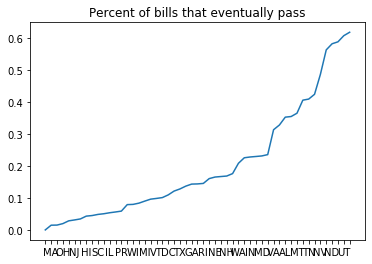

<Figure size 720x432 with 0 Axes>

In [7]:
df = df[['abbr', 'passed_lower', 'passed_upper', 'signed']]
df = df.fillna(0)
for col in df.columns[1:]:
    mask = df[col]!=0
    df.loc[mask, col] = 1
df = df.astype({"abbr":str, "signed": int, "passed_upper": int, "passed_lower":int})
passage_agg = df.groupby('abbr').agg(["mean", "count"])
#sm = passage_agg['signed']['count'].sort_values(axis=0)
sm = passage_agg['signed']['mean'].sort_values(axis=0)


fig, ax = plt.subplots()
ax.plot( range(len(sm)), sm.values)
plt.xticks(ticks = [])
ax.set_xticks(range(len(sm)))
ax.set_xticklabels(sm.index.values)
#plt.label = 'xx'
ax.set_title("Percent of bills that eventually pass")
#fig.sup_title = ""

matplotlib.rcParams['figure.figsize'] = [10,6]

# Thin the x-axis labels for visibility
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)
    
plt.show()
plt.savefig("passage_fraction.png")

In [8]:
# Calculate the version number of the bill.

# NOTES: Updated_at may potentialy be the same for each bill_id, we order by the id in this case
a = bv
a['version_number'] = a[['id', 'bill_id', 'updated_at']].groupby('bill_id').cumcount()+1
a[['id', 'bill_id', 'version_number', 'updated_at']].sort_values('bill_id').tail(n=100)

,id,bill_id,version_number,updated_at
615166,2743086,1347140,3,2020-08-07 20:47:51
615165,2743085,1347140,2,2020-08-07 20:47:51
615164,2743084,1347140,1,2020-08-07 20:47:50
615167,2743087,1347142,1,2020-08-07 20:48:01
615169,2743089,1347142,3,2020-08-07 20:48:03
...,...,...,...,...
615238,2743158,1347259,1,2020-08-08 02:16:56
615240,2743160,1347260,1,2020-08-08 02:17:07
615241,2743161,1347261,1,2020-08-08 02:17:20
615242,2743162,1347262,1,2020-08-08 02:17:30


In [9]:
a[['bill_id', 'name', 'id', 'version_number']].sort_values('version_number', ascending=False).head(n=100)

,bill_id,name,id,version_number
225855,1211737,"Section 15-18- Appropriations Clauses, Safety ...",2350546,223
225854,1211737,Section 14- FY 2018-19 Public Health & Environ...,2350545,222
225853,1211737,Section 13- FY 2018-19 Personnel (04/17/2019),2350544,221
225852,1211737,Section 12- FY 2018-19 Judicial (04/17/2019),2350543,220
225851,1211737,Section 11- FY 2018-19 Human Services (04/17/2...,2350542,219
...,...,...,...,...
210299,1211737,Natural Resources (04/05/2019),2334939,164
418463,1301160,995079 - Amendment to S 2500 Filed,2544386,164
557461,1337882,Law (06/12/2020),2685381,164
557460,1337882,Labor (06/12/2020),2685380,163


In [10]:
pl      = pd.read_csv("../references/derived/partisan_lean.csv", sep=",", encoding="latin1", parse_dates=True)
#doc_len = pd.read_csv("../notebooks/doc_len.csv")

In [11]:
ml_data = a[['id', 'version_number', 'bill_id']].merge(bills[['id', 'signed', 'session_id', 'chamber_id']].rename(columns={'id':"bill_id"}), on='bill_id')
ml_data = ml_data.merge(pl[['session_id', 'chamber_id', 'partisan_lean']], on=['session_id', 'chamber_id'])
ml_data = ml_data.fillna(0)


In [12]:
ml_data['sc_id'] = ml_data['session_id'].astype(str) + "-" + ml_data['chamber_id'].astype(str)
ml_data = ml_data[['id', 'version_number', 'bill_id', 'signed', 'partisan_lean',  'sc_id']]

In [19]:
s1 = ml_data[['bill_id', 'id']].groupby('bill_id').sample(1)
ml_data = ml_data.merge(s1, on = ['id', 'bill_id'])

In [20]:
ml_data.to_csv('../references/derived/ml_data.csv', index=False)

In [21]:
df2 = pd.read_csv("../references/derived/ml_data.csv", encoding="latin1", parse_dates=True)
df2.head()

,id,version_number,bill_id,signed,partisan_lean,sc_id
0,2708957,11,1092981,0,0.236118,562-1
1,2127866,1,1098149,1,0.236118,562-1
2,2127963,1,1098199,0,0.236118,562-1
3,2128334,1,1098465,0,0.236118,562-1
4,2128986,1,1098872,1,0.236118,562-1


In [22]:
ml_data.head()

,id,version_number,bill_id,signed,partisan_lean,sc_id
0,2708957,11,1092981,0,0.236118,562-1
1,2127866,1,1098149,1,0.236118,562-1
2,2127963,1,1098199,0,0.236118,562-1
3,2128334,1,1098465,0,0.236118,562-1
4,2128986,1,1098872,1,0.236118,562-1


In [23]:
ml_data.shape

(199646, 6)